# 데이터 불러오기

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
base_path = './preprocessed data/'

train_err = pd.read_csv(base_path + 'new_train_err.csv', parse_dates=['time'])
train_quality = pd.read_csv(base_path + 'new_train_quality.csv', parse_dates=['time'])
train_problem = pd.read_csv(base_path + 'new_train_problem.csv', parse_dates=['time'])
test_err = pd.read_csv(base_path + 'new_test_err.csv', parse_dates=['time'])
test_quality = pd.read_csv(base_path + 'new_test_quality.csv', parse_dates=['time'])
submission = pd.read_csv("C:/Users/gmlkd/data/시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회_data/sample_submission.csv")

## 데이터 분석

In [10]:
train_err.head()

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,2020-11-01 02:56:16,model_3,05.15.2138,15,1
1,10000,2020-11-01 03:03:09,model_3,05.15.2138,12,1
2,10000,2020-11-01 03:03:09,model_3,05.15.2138,11,1
3,10000,2020-11-01 05:05:14,model_3,05.15.2138,16,1
4,10000,2020-11-01 05:05:15,model_3,05.15.2138,4,0


### 시간대별 분석

#### train_err

In [11]:
# 일별 에러 발생

# 비교적 주말에 에러가 많이 발생했다.
train_err.time.dt.day.value_counts()

21    562283
22    556151
15    554778
1     553561
7     551177
8     541958
28    527480
29    525630
14    520291
19    518417
6     516747
2     513572
23    513511
24    509559
9     507302
18    506377
5     502597
20    501508
26    499517
12    497408
10    497012
3     496842
27    492887
16    492638
25    492618
4     489363
11    488927
30    484872
17    483993
13    469020
31         5
Name: time, dtype: int64

In [12]:
# 11월 1일로 들어가도 될 것같다.
train_err[train_err.time.dt.day == 31]

,user_id,time,model_nm,fwver,errtype,errcode
5892567,15801,2020-10-31 23:59:59,model_0,04.22.1750,16,1
8533535,18418,2020-10-31 23:59:59,model_0,04.22.1750,26,1
11304925,20974,2020-10-31 23:59:59,model_0,04.22.1750,26,1
12545032,22249,2020-10-31 23:59:59,model_0,04.22.1750,26,1
12698894,22385,2020-10-31 23:59:59,model_2,04.33.1185,26,1


<AxesSubplot:xlabel='time', ylabel='Count'>

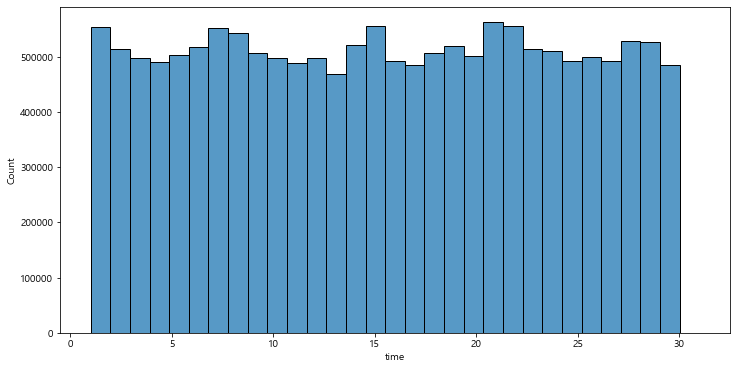

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(data=train_err, x=train_err.time.dt.day, bins=31)

In [14]:
# 시간대별 에러발생
train_err.time.dt.hour.value_counts()

19    824162
20    792258
21    791873
18    783808
22    729112
17    713929
8     677857
0     658982
2     648567
16    647170
3     645580
4     643244
9     637959
23    622782
7     618374
13    603780
15    600263
12    592900
10    592178
14    581045
11    575142
5     519059
6     444071
1     423906
Name: time, dtype: int64

<AxesSubplot:xlabel='time', ylabel='Count'>

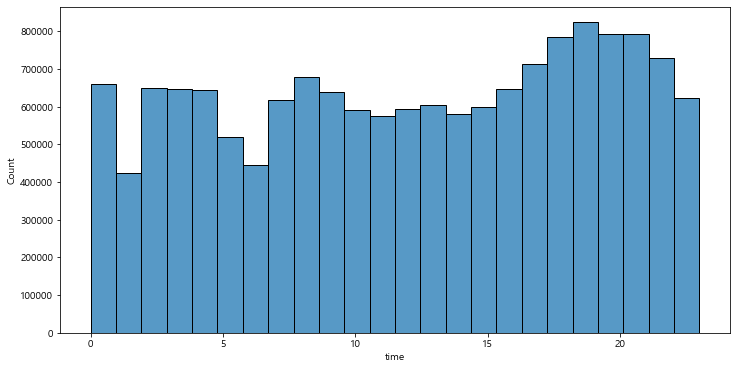

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(data=train_err, x=train_err.time.dt.hour, bins=24)

#### train_problem 

In [16]:
# 요일별 불만 제기 수

train_problem.time.dt.day_of_week.value_counts()

0    1332
2     868
4     853
1     809
3     809
5     431
6     327
Name: time, dtype: int64

<AxesSubplot:xlabel='time', ylabel='Count'>

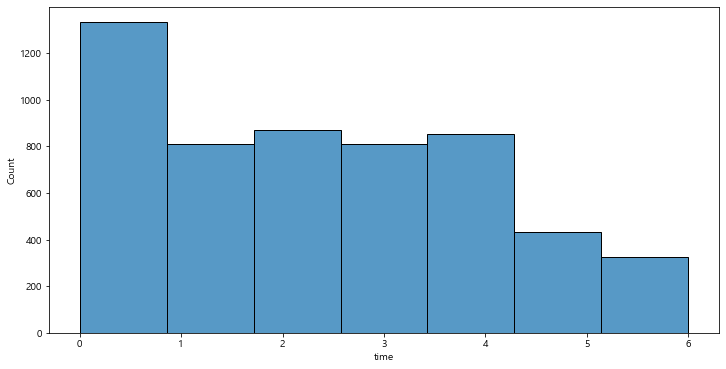

In [17]:
# 주말에 에러가 많이 발생하지만 불만 제기는 월요일이 가장 많다.
# 주말에는 고객센터가 문을 열지 않을 것이라 생각했을 수 있다.

plt.figure(figsize=(12,6))
sns.histplot(data=train_problem, x=train_problem.time.dt.day_of_week, bins=7)

In [18]:
# 시간대별 불만 제기 수
train_problem.time.dt.hour.value_counts()

12    627
11    600
13    518
19    507
18    492
15    489
16    460
17    432
22    233
20    233
14    228
21    204
23    175
0     108
1      67
2      15
10     14
9       8
5       5
8       5
3       4
4       3
7       1
6       1
Name: time, dtype: int64

<AxesSubplot:xlabel='time', ylabel='Count'>

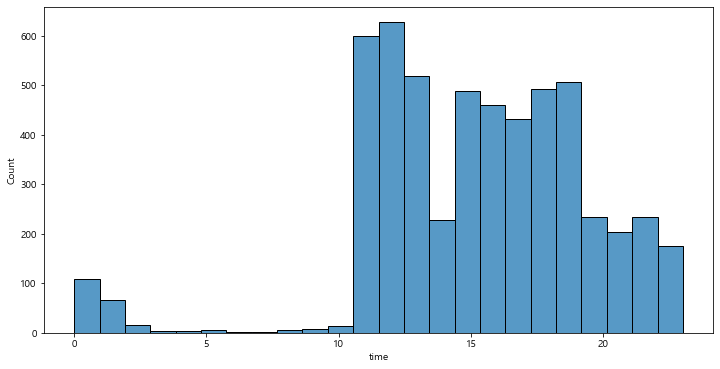

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(data=train_problem, x=train_problem.time.dt.hour, bins=24)

- 에러가 발생한 요일, 시간대는 큰 차이가 나지 않는다.
- 하지만 불만을 제기한 요일과 시간대는 꽤 유의미한 차이가 난다.
- 따라서 에러가 발생한 요일, 시간은 trian set에 넣어도 될 것 같다.

### model_nm 분석

#### model_nm에 따른 불만율

In [20]:
train_err.model_nm.unique()

array(['model_3', 'model_2', 'model_0', 'model_1', 'model_7', 'model_4',
       'model_5', 'model_8', 'model_6'], dtype=object)

In [21]:
problem_id_list = list(train_problem.user_id)

In [22]:
len(problem_id_list)

5429

In [23]:
id_model = train_err.groupby('model_nm')['user_id'].unique().to_frame()
id_model

,user_id
model_nm,
model_0,"[10004, 10005, 10007, 10008, 10011, 10013, 100..."
model_1,"[10006, 10009, 10010, 10021, 10023, 10031, 100..."
model_2,"[10001, 10003, 10006, 10012, 10014, 10017, 100..."
model_3,"[10000, 10002, 10016, 10018, 10019, 10026, 100..."
model_4,"[10080, 10092, 10167, 10168, 10171, 10206, 102..."
model_5,"[10110, 10408, 10411, 10600, 10719, 11058, 119..."
model_6,"[10495, 10693, 11157, 11183, 11206, 11319, 114..."
model_7,"[10075, 10244, 10556, 10694, 10744, 10922, 111..."
model_8,"[10202, 10286, 10458, 10690, 11086, 11416, 114..."


In [24]:
id_model['count'] = 0

In [25]:
id_model.iloc[0]

user_id    [10004, 10005, 10007, 10008, 10011, 10013, 100...
count                                                      0
Name: model_0, dtype: object

In [26]:
for i in range(len(id_model.index)):
    for j in problem_id_list:
        if j in id_model.iloc[i, 0]:
            id_model.iloc[i, 1] += 1

In [27]:
id_model

,user_id,count
model_nm,,
model_0,"[10004, 10005, 10007, 10008, 10011, 10013, 100...",1769
model_1,"[10006, 10009, 10010, 10021, 10023, 10031, 100...",1426
model_2,"[10001, 10003, 10006, 10012, 10014, 10017, 100...",1918
model_3,"[10000, 10002, 10016, 10018, 10019, 10026, 100...",789
model_4,"[10080, 10092, 10167, 10168, 10171, 10206, 102...",153
model_5,"[10110, 10408, 10411, 10600, 10719, 11058, 119...",23
model_6,"[10495, 10693, 11157, 11183, 11206, 11319, 114...",10
model_7,"[10075, 10244, 10556, 10694, 10744, 10922, 111...",36
model_8,"[10202, 10286, 10458, 10690, 11086, 11416, 114...",25


In [28]:
count_sum = id_model['count'].values.sum()
count_sum

6149

In [29]:
id_model['problem_rate'] = id_model['count'] / count_sum * 100
id_model

,user_id,count,problem_rate
model_nm,,,
model_0,"[10004, 10005, 10007, 10008, 10011, 10013, 100...",1769,28.768906
model_1,"[10006, 10009, 10010, 10021, 10023, 10031, 100...",1426,23.190763
model_2,"[10001, 10003, 10006, 10012, 10014, 10017, 100...",1918,31.192064
model_3,"[10000, 10002, 10016, 10018, 10019, 10026, 100...",789,12.831355
model_4,"[10080, 10092, 10167, 10168, 10171, 10206, 102...",153,2.488209
model_5,"[10110, 10408, 10411, 10600, 10719, 11058, 119...",23,0.374045
model_6,"[10495, 10693, 11157, 11183, 11206, 11319, 114...",10,0.162628
model_7,"[10075, 10244, 10556, 10694, 10744, 10922, 111...",36,0.585461
model_8,"[10202, 10286, 10458, 10690, 11086, 11416, 114...",25,0.406570


In [30]:
id_model['error_rate'] = train_err.model_nm.value_counts().sort_index() / train_err.model_nm.value_counts().sum() * 100

In [31]:
id_model

,user_id,count,problem_rate,error_rate
model_nm,,,,
model_0,"[10004, 10005, 10007, 10008, 10011, 10013, 100...",1769,28.768906,26.026404
model_1,"[10006, 10009, 10010, 10021, 10023, 10031, 100...",1426,23.190763,34.416356
model_2,"[10001, 10003, 10006, 10012, 10014, 10017, 100...",1918,31.192064,21.419331
model_3,"[10000, 10002, 10016, 10018, 10019, 10026, 100...",789,12.831355,11.987284
model_4,"[10080, 10092, 10167, 10168, 10171, 10206, 102...",153,2.488209,5.512259
model_5,"[10110, 10408, 10411, 10600, 10719, 11058, 119...",23,0.374045,0.192302
model_6,"[10495, 10693, 11157, 11183, 11206, 11319, 114...",10,0.162628,0.011114
model_7,"[10075, 10244, 10556, 10694, 10744, 10922, 111...",36,0.585461,0.216300
model_8,"[10202, 10286, 10458, 10690, 11086, 11416, 114...",25,0.406570,0.218649


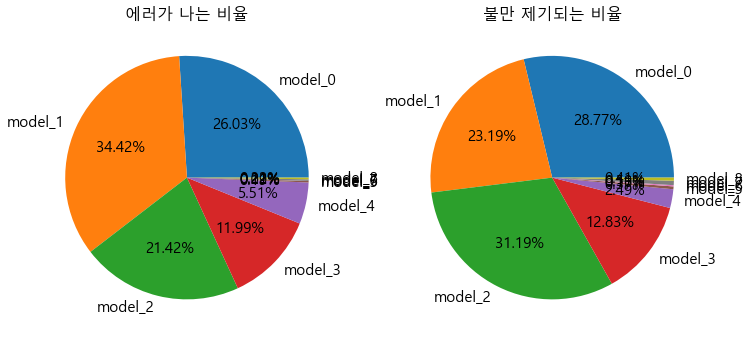

In [32]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.title('에러가 나는 비율', fontsize=16)
plt.pie(id_model['error_rate'], labels=id_model.index, autopct='%.2f%%', textprops={'fontsize':15})

plt.subplot(122)
plt.title('불만 제기되는 비율', fontsize=16)
plt.pie(id_model['problem_rate'], labels=id_model.index, autopct='%.2f%%', textprops={'fontsize':15})
plt.show()

- 에러는 model_1  > model_0 > model_2 순서로 많지만
- 해당 에러로 불만을 제기하는 사용자는 model_2 > model_0 > model_1 순서
- 모델에 따라 불만 제기 확률 편차가 크기 때문에 model_nm은 유의미한 column

#### model_nm 변경

In [33]:
change_model =  train_err[['user_id', 'model_nm']]

In [34]:
change_model = change_model.drop_duplicates(subset=None, keep='first')

In [35]:
user_model_num = change_model.user_id.value_counts()
user_has_2models = list(user_model_num.loc[user_model_num > 1].to_frame().index)

In [36]:
user_sum = len(user_has_2models)
user_prob_sum = len(list(train_problem[train_problem['user_id'].isin(user_has_2models)].user_id.unique()))

print(f"모델이 변경되고 불만을 제기한 사람 {user_prob_sum/user_sum*100}% ")

모델이 변경되고 불만을 제기한 사람 91.4651493598862% 


- model_nm 변경이 불만 제기에 많은 영향을 미친다

#### model_nm - fwver

In [37]:
model_fwver = train_err.groupby('model_nm')['fwver'].unique().to_frame().reset_index()
model_fwver

,model_nm,fwver
0,model_0,"[04.22.1750, 04.22.1778, 04.22.1684, 04.22.166..."
1,model_1,"[04.16.3553, 04.16.3571, 04.16.3439, 04.16.356..."
2,model_2,"[04.33.1185, 04.33.1261, 04.33.1149, 04.33.117..."
3,model_3,"[05.15.2138, 05.15.2120, 05.15.2090, 05.15.310..."
4,model_4,"[03.11.1149, 03.11.1167, 03.11.1141]"
5,model_5,"[04.82.1684, 04.82.1778, 04.82.1730]"
6,model_6,"[10, 8.5.3]"
7,model_7,"[05.66.3237, 05.66.3571]"
8,model_8,"[04.73.2237, 04.73.2571]"


In [38]:
# model_6를 제외하고 모델별로 4번째까지 같은 펌웨어 번호를 사용한다.

for nm in range(len(model_fwver.index)):
    print(f"{model_fwver.index[nm]} -> \n {sorted(model_fwver.iloc[nm][0])}")

0 -> 
 ['0', '_', 'd', 'e', 'l', 'm', 'o']
1 -> 
 ['1', '_', 'd', 'e', 'l', 'm', 'o']
2 -> 
 ['2', '_', 'd', 'e', 'l', 'm', 'o']
3 -> 
 ['3', '_', 'd', 'e', 'l', 'm', 'o']
4 -> 
 ['4', '_', 'd', 'e', 'l', 'm', 'o']
5 -> 
 ['5', '_', 'd', 'e', 'l', 'm', 'o']
6 -> 
 ['6', '_', 'd', 'e', 'l', 'm', 'o']
7 -> 
 ['7', '_', 'd', 'e', 'l', 'm', 'o']
8 -> 
 ['8', '_', 'd', 'e', 'l', 'm', 'o']


- model과 fwver은 관련성이 높다 -> fwver만 사용해도 될지?

### fwver 분석

#### fwver에 따른 불만율

In [39]:
fwver_df = train_err[['user_id', 'fwver']]

In [40]:
fwver_df = fwver_df.drop_duplicates(subset=None, keep='first')

In [41]:
user_fwver = fwver_df.groupby('fwver')['user_id'].unique().to_frame().reset_index()

In [42]:
for i in range(37):
    user_fwver['count'][i] = len(list(train_problem[train_problem['user_id'].isin(user_fwver.user_id[i])].user_id.unique()))


KeyError: 'count'

In [ ]:
user_fwver['rate'] = 0

In [ ]:
for i in range(37):
        user_fwver['rate'][i] = round(user_fwver['count'][i]/len(user_fwver.user_id[i]) * 100, 2)

In [ ]:
user_fwver

In [ ]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=45)
sns.barplot(data=user_fwver, x='fwver', y='rate', order=user_fwver.sort_values('rate').fwver)

- fwver에 따라 불만율 차이가 많이 난다

#### fwver업데이트

In [ ]:
# fwver이 바뀌는 user가 많다. 
# fwver이 변경되었을 때 불만 제기율 확인
# fwver_df 사용
fwver_df

In [ ]:
user_fwver_num = fwver_df['user_id'].value_counts()
user_has_2fwvers = list(user_sum.loc[user_sum>1].to_frame().index)

In [ ]:
user_sum = len(user_has_2fwvers)
user_prob_sum =  len(list(train_problem[train_problem['user_id'].isin(user_has_2fwvers)].user_id.unique()))

print(f"fwver가 변경되고 불만을 제기한 사람 {user_prob_sum/user_sum*100}% ")

- fwver이 변경되었을 때 변수가 유의미하게 작용한다.

### errtype 분석

### errcode 분석

### Quality 분석

In [ ]:
train_quality.describe()

## 2-3. 이상치 검출

1) IQR(Inter-Quantile Range)


2) Outlier Detection method (e.g. Isolation Forest)

## 3. 예측 모델 구현

In [ ]:
# 모델을 불러옵니다


In [ ]:
# 학습에 필요한 데이터셋을 만듭니다


In [ ]:
# 학습 및 모델 검증을 위해 KFold Cross Validation 기법을 사용합니다.


In [ ]:
# training

In [ ]:
# submission 파일 생성